Practical Exam Python


Part 2. Practical Question

This dataset contains HR Data Analytics. By using features, predict whether employee will leave company or not.
(“left” is target column).
You are asked to build model for predicting patients having heart disease.
1. Import data (HR_data.csv) and get familiarized with it. (show statistical summary, percentage of missing
values in each column and check duplicate values.) (6 points)
2. Show distribution of variables, correlation between them and check imbalance problem. (6 points)
3. Prepare data for modelling. (7 points)
4. Fit data into different models – Logistic regression, Decision Tree, Naive Bayes and XGBoost models. (10
points)
5. Print detailed reports regarding accuracy metrics for each model. (8 points)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [7]:
df = pd.read_csv('/content/HR_data - HR_data - HR_data - HR_data - HR_data - HR_data - HR_data - HR_data.csv')
df

,Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Age,left
0,1,0.38,0.53,2,157,3,0,0,sales,low,23.0,1
1,2,0.80,0.86,5,262,6,0,0,sales,medium,34.0,1
2,3,0.11,0.88,7,272,4,0,0,sales,medium,19.0,1
3,4,0.72,0.87,5,223,5,0,0,sales,low,35.0,1
4,5,0.37,0.52,2,159,3,0,0,sales,low,45.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14995,0.40,0.57,2,151,3,0,0,support,low,25.0,1
14995,14996,0.37,0.48,2,160,3,0,0,support,low,23.0,1
14996,14997,0.37,0.53,2,143,3,0,0,support,low,34.0,1
14997,14998,0.11,0.96,6,280,4,0,0,support,low,19.0,1


In [8]:
df.describe()

,Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Age,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,158.000000,14999.000000
mean,7500.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,34.018987,0.238083
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,10.068220,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,19.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,24.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,35.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,45.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,49.000000,1.000000


In [9]:
df.isnull().sum()

,0
Id,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
promotion_last_5years,0
Department,0
salary,0


In [10]:
df.nunique()

,0
Id,14999
satisfaction_level,92
last_evaluation,65
number_project,6
average_montly_hours,215
time_spend_company,8
Work_accident,2
promotion_last_5years,2
Department,10
salary,3


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  Age                    158 non-null    float64
 11  left                   14999 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1.4+ MB


In [12]:
df['Age']

,Age
0,23.0
1,34.0
2,19.0
3,35.0
4,45.0
...,...
14994,25.0
14995,23.0
14996,34.0
14997,19.0


In [13]:
df.isnull().mean() * 100

,0
Id,0.000000
satisfaction_level,0.000000
last_evaluation,0.000000
number_project,0.000000
average_montly_hours,0.000000
time_spend_company,0.000000
Work_accident,0.000000
promotion_last_5years,0.000000
Department,0.000000
salary,0.000000


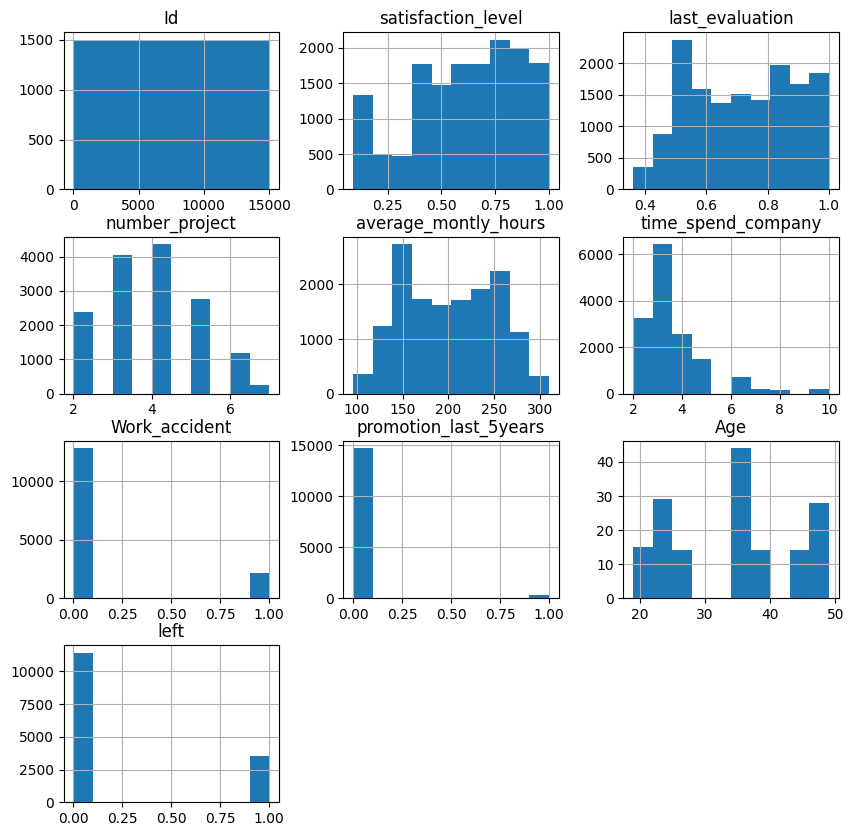

In [14]:
df.hist(figsize=(10,10))
plt.show()

In [15]:
df["Age"] = df["Age"].fillna(df["Age"].median())


In [16]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  Age                    14999 non-null  float64
 11  left                   14999 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1.4+ MB


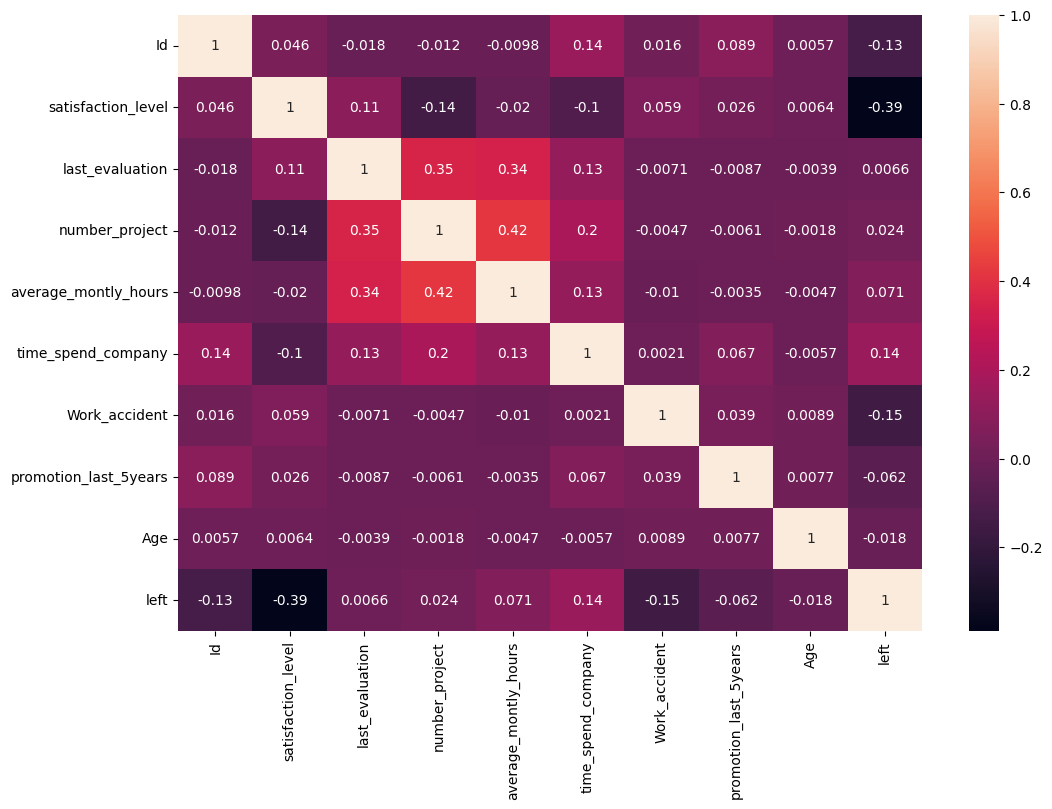

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include = 'number').corr(),annot=True)
plt.show()

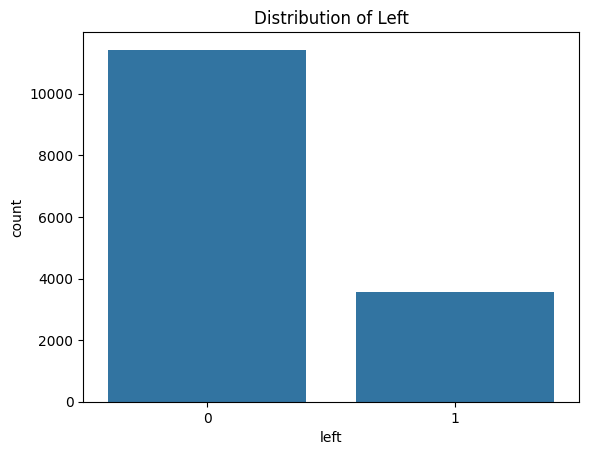

In [18]:
sns.countplot(x = 'left', data = df)
plt.title('Distribution of Left')
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


df_encoded = pd.get_dummies(df, columns=['salary', 'Department'])

X = df_encoded.drop('left', axis=1)
y = df_encoded['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
#Logistic regression, Decision Tree, Naive Bayes and XGBoost models.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [22]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier()
}

fit_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    fit_models[name] = model

    y_pred = model.predict(X_test)

    print(f'\nModel: {name}')
    print('-------------------------')

    score = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score: {score:.4f}")

    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))



Model: Logistic Regression
-------------------------
Accuracy Score: 0.7847
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2294
           1       0.60      0.26      0.37       706

    accuracy                           0.78      3000
   macro avg       0.70      0.60      0.62      3000
weighted avg       0.76      0.78      0.75      3000

[[2167  127]
 [ 519  187]]

Model: Decision Tree
-------------------------
Accuracy Score: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2294
           1       1.00      1.00      1.00       706

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

[[2294    0]
 [   0  706]]

Model: Naive Bayes
-------------------------
Accuracy Score: 0.8403
              precision    recall  f1-score   support

           0       0

PART 2: Practical question

This is a dataset from the U.S. Census Bureau hosted by the Federal Reserve Economic Database (FRED).
The dataset consists of change in the number of population of X state from 01-01-1952 till 12-01-2019.
You are asked to build a forecasting model using Deep Learning techniques.
1. Import data (pop.csv) and get familiarized with it. (show statistics summary, search for missing values etc.)
(5 points)
2. Visualize ‘value’ column according to time. Find correlation between them. (3 points)
3. Prepare data for modelling. (5 points)
4. Define model parameters. Fit data into Prophet model. (7 points)
5. Plot components of Prophet model, visualize predicted and actual values. (3 points)

In [23]:
df1 = pd.read_csv('/content/POP - POP - POP - POP - POP - POP - POP - POP.csv')
df1

,realtime_start,value,date,realtime_end
0,2019-12-06,156309.000,1952-01-01,2019-12-06
1,2019-12-06,156527.000,1952-02-01,2019-12-06
2,2019-12-06,156731.000,1952-03-01,2019-12-06
3,2019-12-06,156943.000,1952-04-01,2019-12-06
4,2019-12-06,157140.000,1952-05-01,2019-12-06
...,...,...,...,...
811,2019-12-06,329591.333,2019-08-01,2019-12-06
812,2019-12-06,329785.872,2019-09-01,2019-12-06
813,2019-12-06,329982.035,2019-10-01,2019-12-06
814,2019-12-06,330154.949,2019-11-01,2019-12-06


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   realtime_start  816 non-null    object 
 1   value           816 non-null    float64
 2   date            816 non-null    object 
 3   realtime_end    816 non-null    object 
dtypes: float64(1), object(3)
memory usage: 25.6+ KB


In [25]:
df1.describe()

,value
count,816.000000
mean,243847.767826
std,50519.140567
min,156309.000000
25%,201725.250000
50%,239557.500000
75%,289364.250000
max,330309.946000


In [26]:
df1.isna().sum()*100

,0
realtime_start,0
value,0
date,0
realtime_end,0


In [27]:
df1['date'] = pd.to_datetime(df1['date'])


fig = px.line(
    df1,
    x = 'date',
    y = 'value',
    title = 'Closing Price over line',
    markers = True
)

fig.update_layout(
    template = 'plotly_dark',
    xaxis_title = 'Date',
    yaxis_title = 'Clothing prise (USD)',
    hovermode = 'x unified'
)

fig.show()

In [28]:
pip install bayesian-optimization


In [29]:
import logging
import pandas as pd
import numpy as np
from prophet import Prophet
from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_absolute_error


In [30]:
df1 = df1[['date','value']]
df1.columns = ['ds', 'y']
df1['ds'] = pd.to_datetime(df1['ds'])

In [31]:
df1

,ds,y
0,1952-01-01,156309.000
1,1952-02-01,156527.000
2,1952-03-01,156731.000
3,1952-04-01,156943.000
4,1952-05-01,157140.000
...,...,...
811,2019-08-01,329591.333
812,2019-09-01,329785.872
813,2019-10-01,329982.035
814,2019-11-01,330154.949


In [32]:
train_size = int(0.97 * len(df1))
train_df = df1.iloc[:train_size]
test_df = df1.iloc[train_size:]
print(len(test_df))
test_df

25


,ds,y
791,2017-12-01,326301.399
792,2018-01-01,326454.123
793,2018-02-01,326600.823
794,2018-03-01,326736.690
795,2018-04-01,326887.866
796,2018-05-01,327048.704
797,2018-06-01,327219.140
798,2018-07-01,327403.909
799,2018-08-01,327600.250
800,2018-09-01,327794.788


In [34]:
def Prophet_cv(changepoint_prior_scale, seasonality_prior_scale, holidays_prior_scale):
  model = Prophet(
      changepoint_prior_scale = changepoint_prior_scale,
      seasonality_prior_scale = seasonality_prior_scale,
      holidays_prior_scale = holidays_prior_scale
  )
  model.fit(train_df)
  future = model.make_future_dataframe(periods = len(test_df))
  forecast = model.predict(future)
  y_pred = forecast['yhat'].iloc[-len(test_df):].values
  y_true = test_df['y'].values
  mae = mean_absolute_error(y_true, y_pred)
  return -mae

pbounds = {
    'changepoint_prior_scale': (0.001, 0.5),
    'seasonality_prior_scale': (0.1, 20),
    'holidays_prior_scale': (0.1, 20)
}

optimizer = BayesianOptimization(
    f = Prophet_cv,
    pbounds = pbounds,
    random_state = 42
)

optimizer.maximize(init_points = 5, n_iter = 25)
best_params = optimizer.max['params']
print('Best params is:', best_params)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


|   iter    |  target   | change... | season... | holida... |
-------------------------------------------------------------


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


| 1         | -1380.062 | 0.1878955 | 19.019214 | 14.666679 |


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


| 2         | -1388.287 | 0.2997305 | 3.2047709 | 3.2042909 |


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


| 3         | -1390.324 | 0.0299837 | 17.336905 | 12.062188 |


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


| 4         | -1382.704 | 0.3543282 | 0.5096314 | 19.401206 |


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


| 5         | -1379.031 | 0.4163888 | 4.3255483 | 3.7183168 |


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


| 6         | -1382.584 | 0.3063145 | 3.6231615 | 6.6203350 |


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


| 7         | -1374.162 | 0.2383038 | 10.356320 | 15.760835 |


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


| 8         | -1381.801 | 0.0776651 | 15.210060 | 11.966007 |


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


| 9         | -1383.384 | 0.1019795 | 1.9015929 | 6.3692813 |


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


| 10        | -1390.839 | 0.2599841 | 2.5083951 | 1.6601130 |


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


| 11        | -1387.500 | 0.0544436 | 10.553315 | 3.2748893 |


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


| 12        | -1376.358 | 0.1682215 | 6.9867828 | 18.985463 |
| 13        | -1383.002 | 0.0837318 | 4.1586805 | 15.973067 |


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


| 14        | -1375.227 | 0.3141185 | 10.966887 | 16.372748 |


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


| 15        | -1380.651 | 0.2291995 | 9.3771636 | 16.924638 |


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


| 16        | -1380.280 | 0.2384266 | 11.359894 | 15.048670 |


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


| 17        | -1379.625 | 0.5       | 9.4364520 | 14.988893 |


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


| 18        | -1381.830 | 0.4779900 | 6.1442911 | 20.0      |


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


| 19        | -1290.041 | 0.001     | 6.7453180 | 17.772244 |


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


| 20        | -1328.888 | 0.0010247 | 6.7394248 | 17.760149 |


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


| 21        | -1384.794 | 0.1132860 | 6.6023155 | 17.775058 |


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


| 22        | -1381.215 | 0.1720976 | 10.458435 | 15.702177 |


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


| 23        | -1378.379 | 0.0569323 | 6.8573071 | 17.834816 |


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


| 24        | -1372.928 | 0.3285945 | 2.0037934 | 18.615393 |


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


| 25        | -1385.560 | 0.4048916 | 14.927716 | 15.588149 |


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


| 26        | -1382.162 | 0.2777512 | 10.941510 | 16.348337 |
| 27        | -1381.835 | 0.2558631 | 15.096773 | 13.237178 |


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


| 28        | -1365.610 | 0.0062361 | 6.7494767 | 17.771851 |


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


| 29        | -1382.647 | 0.1661617 | 19.973530 | 14.795155 |
| 30        | -1385.086 | 0.0488270 | 6.7167462 | 17.758623 |
Best params is: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 6.745318040890534, 'holidays_prior_scale': 17.772244582146694}


In [35]:
best_param = optimizer.max['params']
best_model = Prophet(
    changepoint_prior_scale = best_param['changepoint_prior_scale'],
    seasonality_prior_scale = best_param['seasonality_prior_scale'],
    holidays_prior_scale = best_param['holidays_prior_scale']
)
best_model.fit(df1)

future = best_model.make_future_dataframe(periods=len(test_df))
forecast = best_model.predict(future)

forecast

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1952-01-01,156101.141046,155507.850975,156772.771006,156101.141046,156101.141046,48.199661,48.199661,48.199661,48.199661,48.199661,48.199661,0.0,0.0,0.0,156149.340707
1,1952-02-01,156346.942931,155715.935711,156986.374173,156346.942931,156346.942931,22.165713,22.165713,22.165713,22.165713,22.165713,22.165713,0.0,0.0,0.0,156369.108644
2,1952-03-01,156576.886629,155939.619872,157212.878250,156576.886629,156576.886629,-6.958734,-6.958734,-6.958734,-6.958734,-6.958734,-6.958734,0.0,0.0,0.0,156569.927895
3,1952-04-01,156822.688514,156125.275701,157466.112612,156822.688514,156822.688514,-36.983347,-36.983347,-36.983347,-36.983347,-36.983347,-36.983347,0.0,0.0,0.0,156785.705167
4,1952-05-01,157060.561305,156362.596644,157650.452844,157060.561305,157060.561305,-61.284811,-61.284811,-61.284811,-61.284811,-61.284811,-61.284811,0.0,0.0,0.0,156999.276494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,2019-12-22,331446.625427,331494.240059,332765.710185,331446.625427,331446.625427,716.795018,716.795018,716.795018,716.795018,716.795018,716.795018,0.0,0.0,0.0,332163.420445
837,2019-12-23,331453.068784,331464.876306,332685.486535,331453.068784,331453.068784,665.470978,665.470978,665.470978,665.470978,665.470978,665.470978,0.0,0.0,0.0,332118.539762
838,2019-12-24,331459.512142,331424.456151,332722.355001,331459.512142,331459.512142,606.575346,606.575346,606.575346,606.575346,606.575346,606.575346,0.0,0.0,0.0,332066.087488
839,2019-12-25,331465.955499,331373.647540,332638.436841,331465.955499,331465.955499,541.460624,541.460624,541.460624,541.460624,541.460624,541.460624,0.0,0.0,0.0,332007.416122


In [36]:
comparison_df = pd.DataFrame({
    'ds': test_df['ds'].values,
    'y_true': test_df['y'].values,
    'y_pred': forecast['yhat'].iloc[-len(test_df):].values
})

comparison_df


,ds,y_true,y_pred
0,2017-12-01,326301.399,331376.078837
1,2018-01-01,326454.123,331434.823752
2,2018-02-01,326600.823,331499.140651
3,2018-03-01,326736.690,331567.954578
4,2018-04-01,326887.866,331640.033799
5,2018-05-01,327048.704,331714.019100
6,2018-06-01,327219.140,331788.457205
7,2018-07-01,327403.909,331861.837476
8,2018-08-01,327600.250,331932.630905
9,2018-09-01,327794.788,331999.330362


In [37]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(comparison_df['y_true'], comparison_df['y_pred'])
mae

3692.670113446417

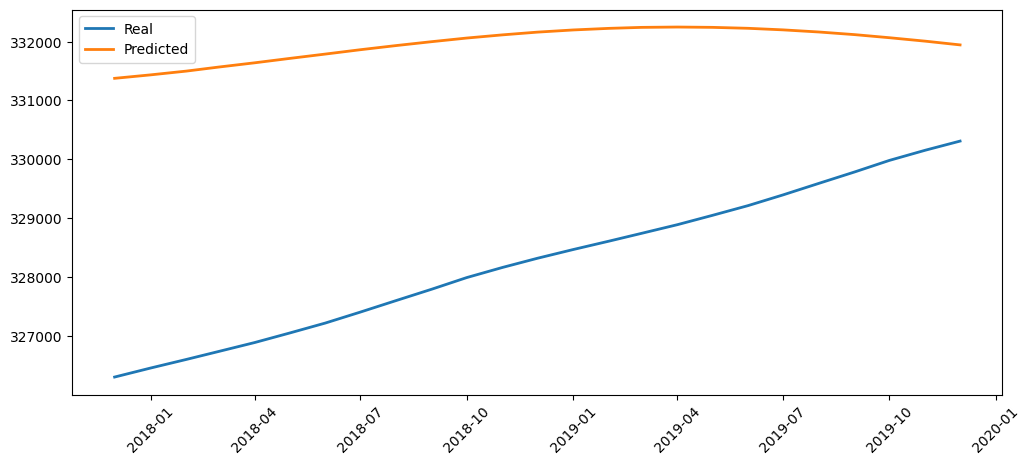

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(comparison_df['ds'], comparison_df['y_true'], label='Real', linewidth=2)
plt.plot(comparison_df['ds'], comparison_df['y_pred'], label='Predicted', linewidth=2)
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [39]:
!pip install neuralprophet


  Using cached pytorch_lightning-1.9.5-py3-none-any.whl.metadata (23 kB)
Using cached pytorch_lightning-1.9.5-py3-none-any.whl (829 kB)
  Attempting uninstall: pytorch-lightning
    Found existing installation: pytorch-lightning 2.6.0
    Uninstalling pytorch-lightning-2.6.0:
      Successfully uninstalled pytorch-lightning-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
neuralforecast 3.1.2 requires pytorch-lightning>=2.0.0, but you have pytorch-lightning 1.9.5 which is incompatible.


In [13]:
from neuralprophet import NeuralProphet

print("NeuralProphet imported successfully!")


AttributeError: module 'sympy' has no attribute 'printing'

In [12]:
!pip install neuralprophet


In [14]:
from neuralprophet import NeuralProphet

print("NeuralProphet imported successfully!")

AttributeError: module 'sympy' has no attribute 'printing'

In [15]:
conda create -n prophet python=3.10
conda activate prophet
pip install neuralprophet


SyntaxError: invalid syntax (ipython-input-211899992.py, line 1)

In [1]:
!pip install neuralforecast


In [44]:
df_fc = df1[['ds', 'y']].copy()
df_fc['unique_id'] = 'series_1'


In [45]:
H = len(test_df)

train_fc = df_fc.iloc[:-H]
test_fc  = df_fc.iloc[-H:]


In [48]:
df_fc.dtypes


,0
ds,datetime64[ns]
y,float64
unique_id,object


In [52]:
from neuralforecast import NeuralForecast
from neuralforecast.models import NHITS

model = NHITS(
    h=H,
    input_size=36,
    max_steps=300
)

fcst = NeuralForecast(
    models=[model],
    freq='M'
)

fcst.fit(train_fc)
forecast = fcst.predict()






INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


┏━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name         ┃ Type          ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ loss         │ MAE           │      0 │ train │     0 │
│ 1 │ padder_train │ ConstantPad1d │      0 │ train │     0 │
│ 2 │ scaler       │ TemporalNorm  │      0 │ train │     0 │
│ 3 │ blocks       │ ModuleList    │  2.5 M │ train │     0 │
└───┴──────────────┴───────────────┴────────┴───────┴───────┘

Trainable params: 2.5 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 2.5 M                                                                                                
Total estimated model params size (MB): 9                                                                          
Modules in train mode: 34                                                                                          
Modules in eval mode: 0                                                                                            
Total FLOPs: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=300` reached.


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


Output()

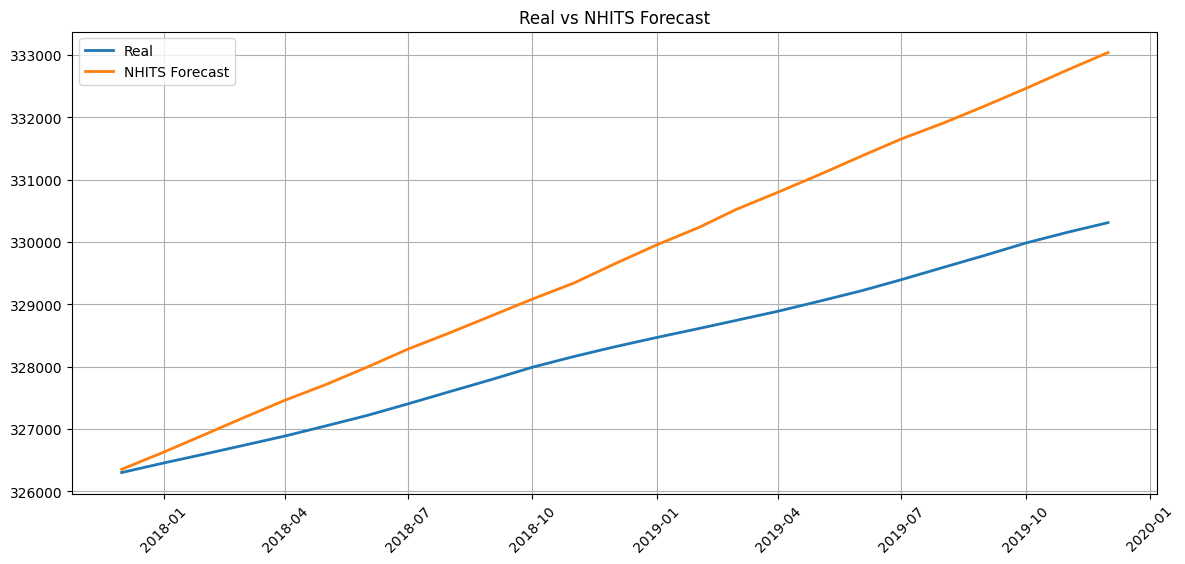

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

plt.plot(test_fc['ds'], test_fc['y'], label='Real', linewidth=2)
plt.plot(test_fc['ds'], forecast['NHITS'], label='NHITS Forecast', linewidth=2)

plt.title("Real vs NHITS Forecast")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
